## Digit Recognizer - Shailesh

* A classic problem in the field of pattern recognition is that of handwritten digit recognition. 
  Suppose that you have images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities.

* The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image.

In [120]:
#supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1 : Import the Dataset

In [2]:
# Importing the dataset

digit_train = pd.read_csv("train.csv")
digit_test = pd.read_csv("test.csv")

In [3]:
# Check the Train Dataset 

digit_train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

In [4]:
# Check the Test Dataset 

digit_test.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 784 columns]

In [5]:
# Check the Columns
digit_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [6]:
# Check the Columns
digit_test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [8]:
# Check the Columns
digit_train.info

<bound method DataFrame.info of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          7       0       0       0       0       0       0       0       0   
7          3       0       0       0       0       0       0       0       0   
8          5       0       0       0       0       0       0       0       0   
9          3       0       0       0       0       0       0       0       0   
10         8       0       0       0       0       0       0       0       0   
11      

In [9]:
# Check the Columns
digit_test.info

<bound method DataFrame.info of        pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
5           0       0       0       0       0       0       0       0       0   
6           0       0       0       0       0       0       0       0       0   
7           0       0       0       0       0       0       0       0       0   
8           0       0       0       0       0       0       0       0       0   
9           0       0       0       0       0       0       0       0       0   
10          0       0       0       0       0       0       0       0       0

### Step 2 : Dataset Analysis

In [125]:
# Check the Different attributes of digit dataframe
print(digit_train.shape)
print(digit_test.shape)

(42000, 785)
(28000, 784)


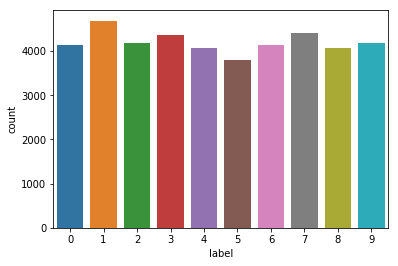

In [126]:
# Plot a Countplot for each variable for the Training Set

sns.countplot(x="label", data=digit_train)
plt.show()

In [131]:
# Check the Mean of the Train Data
digit_train_means = digit_train.groupby('label').mean()
digit_train_means.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
label                                                                           
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
label            ...                                                        
0         0.0    ...          0.0       0.0       0.0       0.0       0.0   
1         0.0    ...          0.0       0.0       0.0       0.0       0.0   
2         0.0    ...          0.0       0.0       0.0       0.0       0.0   
3         0.0    ...          0.0       0.0       0.0       0.0       0.0   
4         0.0    ...          0.0       0.0       0.0       0.0       0.0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
label                                                    
0           0.0       0.0       0.0       0.0       0.0  
1           0.0       0.0       0.0       0.0       0.0  
2           0.0       0.0       0.0       0.0       0.0  
3           0.0       0.0       0.0       0.0       0.0  
4           0.0       0.0       0.0       0.0       0.0  

[5 rows x 784 columns]

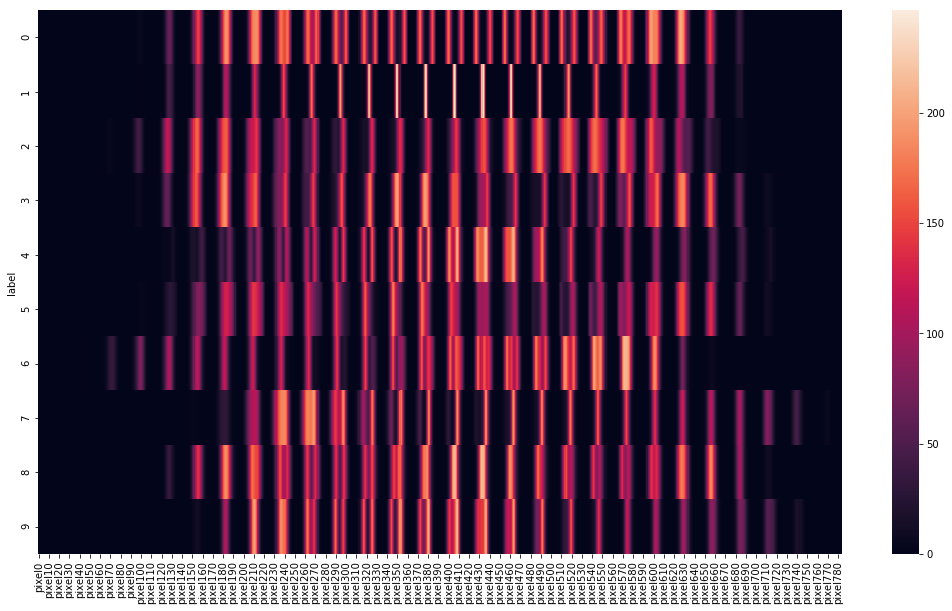

In [132]:
# Plot the Training Data for the Actual Dataset

plt.figure(figsize=(18, 10))
sns.heatmap(digit_train_means)
plt.show()

In [133]:
# Check the Different attributes of train dataframe
digit_train.describe()

label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8    ...         pixel774      pixel775  \
count  42000.0  42000.0  42000.0    ...     42000.000000  42000.000000   
mean       0.0      0.0      0.0    ...         0.219286      0.117095   
std        0.0      0.0      0.0    ...         6.312890      4.633819   
min        0.0      0.0      0.0    ...         0.000000      0.000000   
25%        0.0      0.0      0.0    ...         0.000000      0.000000   
50%        0.0      0.0      0.0    ...         0.000000      0.000000   
75%        0.0      0.0      0.0    ...         0.000000      0.000000   
max        0.0      0.0      0.0    ...       254.000000    254.000000   

           pixel776     pixel777      pixel778      pixel779  pixel780  \
count  42000.000000  42000.00000  42000.000000  42000.000000   42000.0   
mean       0.059024      0.02019      0.017238      0.002857       0.0   
std        3.274488      1.75987      1.894498      0.414264       0.0   
min        0.000000      0.00000      0.000000      0.000000       0.0   
25%        0.000000      0.00000      0.000000      0.000000       0.0   
50%        0.000000      0.00000      0.000000      0.000000       0.0   
75%        0.000000      0.00000      0.000000      0.000000       0.0   
max      253.000000    253.00000    254.000000     62.000000       0.0   

       pixel781  pixel782  pixel783  
count   42000.0   42000.0   42000.0  
mean        0.0       0.0       0.0  
std         0.0       0.0       0.0  
min         0.0       0.0       0.0  
25%         0.0       0.0       0.0  
50%         0.0       0.0       0.0  
75%         0.0       0.0       0.0  
max         0.0       0.0       0.0  

[8 rows x 785 columns]

In [134]:
# Check the Different attributes of digit test dataframe
digit_test.describe()

pixel0   pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7  \
count  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel8   pixel9    ...         pixel774      pixel775      pixel776  \
count  28000.0  28000.0    ...     28000.000000  28000.000000  28000.000000   
mean       0.0      0.0    ...         0.164607      0.073214      0.028036   
std        0.0      0.0    ...         5.473293      3.616811      1.813602   
min        0.0      0.0    ...         0.000000      0.000000      0.000000   
25%        0.0      0.0    ...         0.000000      0.000000      0.000000   
50%        0.0      0.0    ...         0.000000      0.000000      0.000000   
75%        0.0      0.0    ...         0.000000      0.000000      0.000000   
max        0.0      0.0    ...       253.000000    254.000000    193.000000   

           pixel777      pixel778  pixel779  pixel780  pixel781  pixel782  \
count  28000.000000  28000.000000   28000.0   28000.0   28000.0   28000.0   
mean       0.011250      0.006536       0.0       0.0       0.0       0.0   
std        1.205211      0.807475       0.0       0.0       0.0       0.0   
min        0.000000      0.000000       0.0       0.0       0.0       0.0   
25%        0.000000      0.000000       0.0       0.0       0.0       0.0   
50%        0.000000      0.000000       0.0       0.0       0.0       0.0   
75%        0.000000      0.000000       0.0       0.0       0.0       0.0   
max      187.000000    119.000000       0.0       0.0       0.0       0.0   

       pixel783  
count   28000.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0  

[8 rows x 784 columns]

In [135]:
# Check the Unique values in the label column (train)

my_list_train = list(sorted(digit_train.label.unique()))
my_list_train

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [137]:
# Check the % of Records which is null

round(100*digit_train.isnull().sum()/len(digit_train.index),2).sort_values(ascending = False)

pixel783    0.0
pixel267    0.0
pixel265    0.0
pixel264    0.0
pixel263    0.0
pixel262    0.0
pixel261    0.0
pixel260    0.0
pixel259    0.0
pixel258    0.0
pixel257    0.0
pixel256    0.0
pixel255    0.0
pixel254    0.0
pixel253    0.0
pixel252    0.0
pixel251    0.0
pixel250    0.0
pixel249    0.0
pixel248    0.0
pixel247    0.0
pixel246    0.0
pixel245    0.0
pixel266    0.0
pixel268    0.0
pixel390    0.0
pixel269    0.0
pixel290    0.0
pixel289    0.0
pixel288    0.0
           ... 
pixel495    0.0
pixel494    0.0
pixel493    0.0
pixel492    0.0
pixel491    0.0
pixel512    0.0
pixel513    0.0
pixel514    0.0
pixel526    0.0
pixel535    0.0
pixel534    0.0
pixel533    0.0
pixel532    0.0
pixel531    0.0
pixel530    0.0
pixel529    0.0
pixel528    0.0
pixel527    0.0
pixel525    0.0
pixel515    0.0
pixel524    0.0
pixel523    0.0
pixel522    0.0
pixel521    0.0
pixel520    0.0
pixel519    0.0
pixel518    0.0
pixel517    0.0
pixel516    0.0
label       0.0
Length: 785, dtype: floa

In [138]:
# Check the % of Records which is null

round(100*digit_test.isnull().sum()/len(digit_test.index),2).sort_values(ascending = False)

pixel783    0.0
pixel268    0.0
pixel266    0.0
pixel265    0.0
pixel264    0.0
pixel263    0.0
pixel262    0.0
pixel261    0.0
pixel260    0.0
pixel259    0.0
pixel258    0.0
pixel257    0.0
pixel256    0.0
pixel255    0.0
pixel254    0.0
pixel253    0.0
pixel252    0.0
pixel251    0.0
pixel250    0.0
pixel249    0.0
pixel248    0.0
pixel247    0.0
pixel246    0.0
pixel267    0.0
pixel269    0.0
pixel782    0.0
pixel270    0.0
pixel291    0.0
pixel290    0.0
pixel289    0.0
           ... 
pixel496    0.0
pixel495    0.0
pixel494    0.0
pixel493    0.0
pixel492    0.0
pixel513    0.0
pixel514    0.0
pixel515    0.0
pixel527    0.0
pixel536    0.0
pixel535    0.0
pixel534    0.0
pixel533    0.0
pixel532    0.0
pixel531    0.0
pixel530    0.0
pixel529    0.0
pixel528    0.0
pixel526    0.0
pixel516    0.0
pixel525    0.0
pixel524    0.0
pixel523    0.0
pixel522    0.0
pixel521    0.0
pixel520    0.0
pixel519    0.0
pixel518    0.0
pixel517    0.0
pixel0      0.0
Length: 784, dtype: floa

### Step 3 : Perform Sub-Sampling as the Dataset is Huge and requires lot of Processing


In [139]:
# Checking the Counts of Digits samples

label_group = digit_train.groupby(['label'])
label_group_final = label_group.size()
label_group_final

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
dtype: int64

In [140]:
# Picking 800 Records on a Average per label (digit)

# df.loc[np.random.choice(df.index, 5, replace=False)]

digit_train = label_group.apply(lambda x :x.iloc[np.random.choice(range(0,len(x)),800,replace=False)])

In [141]:
# Checking the Counts of Digits samples
sample_size = digit_train.groupby(['label']).size()
sample_size

label
0    800
1    800
2    800
3    800
4    800
5    800
6    800
7    800
8    800
9    800
dtype: int64

In [143]:
# Check the Unique values of the train dataset
sorted(digit_train.label.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [144]:
# Check the parameters
digit_train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  \
label                                                                        
0     8963       0       0       0       0       0       0       0       0   
      18451      0       0       0       0       0       0       0       0   
      2134       0       0       0       0       0       0       0       0   
      32221      0       0       0       0       0       0       0       0   
      10332      0       0       0       0       0       0       0       0   

             pixel7  pixel8    ...     pixel774  pixel775  pixel776  pixel777  \
label                          ...                                              
0     8963        0       0    ...            0         0         0         0   
      18451       0       0    ...            0         0         0         0   
      2134        0       0    ...            0         0         0         0   
      32221       0       0    ...            0         0         0         0   
      10332       0       0    ...            0         0         0         0   

             pixel778  pixel779  pixel780  pixel781  pixel782  pixel783  
label                                                                    
0     8963          0         0         0         0         0         0  
      18451         0         0         0         0         0         0  
      2134          0         0         0         0         0         0  
      32221         0         0         0         0         0         0  
      10332         0         0         0         0         0         0  

[5 rows x 785 columns]

In [145]:
# Check the other parameters
digit_train.describe()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  \
count  8000.000000  8000.0  8000.0  8000.0  8000.0  8000.0  8000.0  8000.0   
mean      4.500000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       2.872461     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       2.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       4.500000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       7.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       9.000000     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel7  pixel8    ...        pixel774     pixel775     pixel776  \
count  8000.0  8000.0    ...     8000.000000  8000.000000  8000.000000   
mean      0.0     0.0    ...        0.204625     0.105750     0.041125   
std       0.0     0.0    ...        6.324378     4.410215     2.657408   
min       0.0     0.0    ...        0.000000     0.000000     0.000000   
25%       0.0     0.0    ...        0.000000     0.000000     0.000000   
50%       0.0     0.0    ...        0.000000     0.000000     0.000000   
75%       0.0     0.0    ...        0.000000     0.000000     0.000000   
max       0.0     0.0    ...      253.000000   253.000000   199.000000   

       pixel777  pixel778  pixel779  pixel780  pixel781  pixel782  pixel783  
count    8000.0    8000.0    8000.0    8000.0    8000.0    8000.0    8000.0  
mean        0.0       0.0       0.0       0.0       0.0       0.0       0.0  
std         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
min         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
25%         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
50%         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
75%         0.0       0.0       0.0       0.0       0.0       0.0       0.0  
max         0.0       0.0       0.0       0.0       0.0       0.0       0.0  

[8 rows x 785 columns]

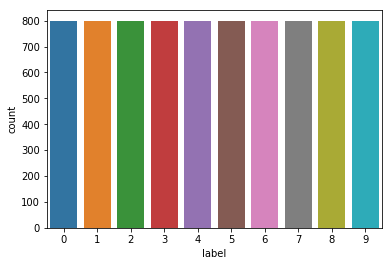

In [146]:
# Plot a Countplot for each variable after sampling

sns.countplot(x="label", data=digit_train)
plt.show()

In [147]:
# Check the Mean of the Train Data
digit_train_means = digit_train.groupby('label').mean()
digit_train_means.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
label                                                                           
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
label            ...                                                        
0         0.0    ...          0.0       0.0       0.0       0.0       0.0   
1         0.0    ...          0.0       0.0       0.0       0.0       0.0   
2         0.0    ...          0.0       0.0       0.0       0.0       0.0   
3         0.0    ...          0.0       0.0       0.0       0.0       0.0   
4         0.0    ...          0.0       0.0       0.0       0.0       0.0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
label                                                    
0           0.0       0.0       0.0       0.0       0.0  
1           0.0       0.0       0.0       0.0       0.0  
2           0.0       0.0       0.0       0.0       0.0  
3           0.0       0.0       0.0       0.0       0.0  
4           0.0       0.0       0.0       0.0       0.0  

[5 rows x 784 columns]

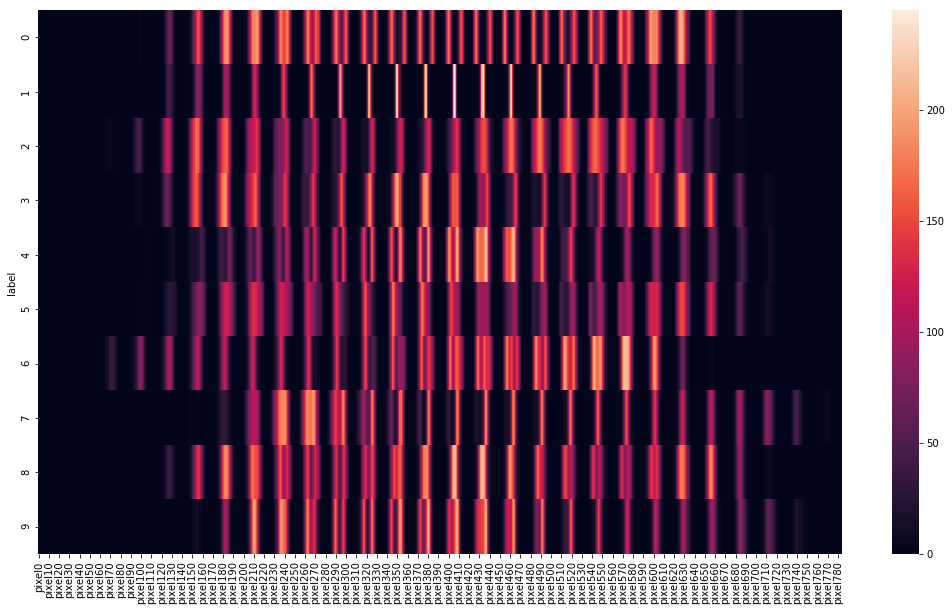

In [148]:
# Plot the Training Data for the Actual Dataset

plt.figure(figsize=(18, 10))
sns.heatmap(digit_train_means)
plt.show()

### Step 4 : Creating the Training and Test Set and Standardizing

In [149]:
# Final Test Set to be tested
X_test_final = digit_test.values/255

In [150]:
# splitting into X and y
X = digit_train.drop("label", axis = 1).values/255
y = digit_train.label.values.astype(int)

In [155]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [153]:
# Assigning the relevant variables for respective models

X_train_Linear = X_train
X_train_Rbf = X_train
X_train_Poly = X_train
X_train_Sigmoid = X_train

X_test_Linear = X_test
X_test_Rbf = X_test
X_test_Poly = X_test
X_test_Sigmoid = X_test

y_train_Linear = y_train
y_train_Rbf = y_train
y_train_Poly = y_train
y_train_Sigmoid = y_train

y_test_Linear = y_test
y_test_Rbf = y_test
y_test_Poly = y_test
y_test_Sigmoid = y_test

### Step 5 : Visualize the Training Data and see how it looks

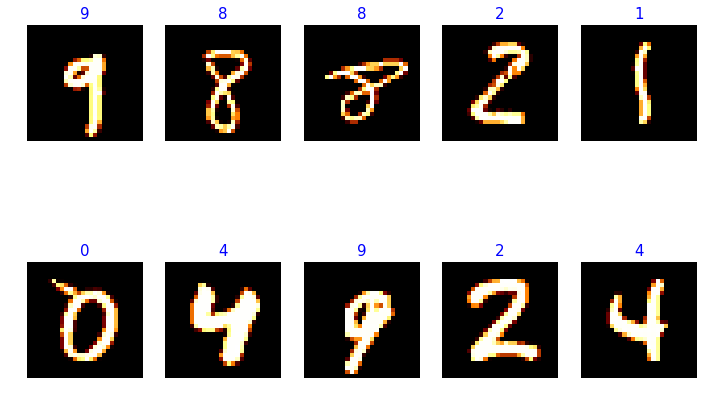

In [161]:
# Plot the Numbers as per the Dataset

fig, axes = plt.subplots(2,5, figsize=(12,8))
axes = axes.flatten()
idx = np.random.randint(0,4000,size=10)
for i in range(10):
    axes[i].imshow(X_train[idx[i],:].reshape(28,28), cmap='afmhot')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(y_train[idx[i]])), color= 'blue', fontsize=15)
plt.show()

### Step 6 : Model Building - Linear Model

In [162]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train_Linear, y_train_Linear)

# predict
y_pred_Linear = model_linear.predict(X_test_Linear)

In [163]:
# confusion matrix and accuracy
from sklearn import metrics

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test_Linear, y_pred=y_pred_Linear), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test_Linear, y_pred=y_pred_Linear))

accuracy: 0.90875 

[[245   0   0   0   0   2   3   0   0   0]
 [  0 236   1   1   0   0   0   0   0   1]
 [  3   0 204   3   4   3   3   4   4   0]
 [  4   1   7 191   0  17   4   0   5   1]
 [  0   1   4   0 233   1   1   0   0   7]
 [  4   0   0   9   2 211   0   0   5   0]
 [  2   0   9   0   2   4 244   0   1   0]
 [  2   2   3   0   3   0   0 200   1   9]
 [  2   3   7  17   0  12   3   2 198   1]
 [  3   0   1   3  11   1   0   8   2 219]]


#### Here we have obtained an Accuracy of 90.87% on the Current Data, using a Linear Model

### Step 6a : Lets perform K-fold Cross validation to ensure the unbiased nature of data - Linear Model

Let's use the ```cross_val_score()``` function

In [164]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 1)

In [165]:
# computing the cross-validation scores 
# note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric

cv_results = cross_val_score(model, X_train_Linear, y_train_Linear, cv = folds, scoring = 'accuracy') 

In [166]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

[ 0.88660714  0.88214286  0.90178571  0.92232143  0.90267857]
mean accuracy = 0.8991071428571429


#### Hence we can see that using 5 fold cross validation we get an Accuracy Score of 89.91%

### Step 6b : Grid Search to Find Optimal Hyperparameter C - Linear Model

K-fold CV helps us compute average metrics over multiple folds, and that is the best indication of the 'test accuracy/other metric scores' we can have. 

But we want to use CV to compute the optimal values of hyperparameters (in this case, the cost C is a hyperparameter). This is done using the ```GridSearchCV()``` method, which computes metrics (such as accuracy, recall etc.) 

In this case, we have only one hyperparameter, though you can have multiple, such as C and gamma in non-linear SVMs. In that case, you need to search through a *grid* of multiple values of C and gamma to find the optimal combination, and hence the name GridSearchCV.

In [167]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                       return_train_score=True)      

In [168]:
# fit the model - it will fit 5 folds across all values of C
model_cv.fit(X_train_Linear, y_train_Linear)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=1)

In [169]:
# results of grid search CV
cv_results_Linear = pd.DataFrame(model_cv.cv_results_)
cv_results_Linear

mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0      47.939823         7.336008         0.792143          0.802857     0.1   
1      19.082177         4.861031         0.899107          0.915045       1   
2       9.014288         3.258824         0.926250          0.962500      10   
3       7.746410         2.784808         0.920714          0.998795     100   
4       7.459272         2.682882         0.921429          1.000000    1000   

        params  rank_test_score  split0_test_score  split0_train_score  \
0   {'C': 0.1}                5           0.789286            0.803795   
1     {'C': 1}                4           0.886607            0.917634   
2    {'C': 10}                1           0.915179            0.963393   
3   {'C': 100}                3           0.911607            0.999107   
4  {'C': 1000}                2           0.909821            1.000000   

   split1_test_score       ...         split2_test_score  split2_train_score  \
0           0.796429       ...                  0.759821            0.783482   
1           0.882143       ...                  0.901786            0.915625   
2           0.917857       ...                  0.928571            0.960491   
3           0.922321       ...                  0.920536            0.998661   
4           0.923214       ...                  0.921429            1.000000   

   split3_test_score  split3_train_score  split4_test_score  \
0           0.817857            0.803125           0.797321   
1           0.922321            0.911607           0.902679   
2           0.936607            0.962500           0.933036   
3           0.933036            0.998661           0.916071   
4           0.933929            1.000000           0.918750   

   split4_train_score  std_fit_time  std_score_time  std_test_score  \
0            0.809821      0.314099        0.114286        0.018758   
1            0.912277      0.113664        0.079894        0.014162   
2            0.960938      0.270960        0.127289        0.008387   
3            0.999107      0.110422        0.061348        0.007196   
4            1.000000      0.148794        0.190615        0.007763   

   std_train_score  
0         0.010492  
1         0.002673  
2         0.001700  
3         0.000268  
4         0.000000  

[5 rows x 21 columns]

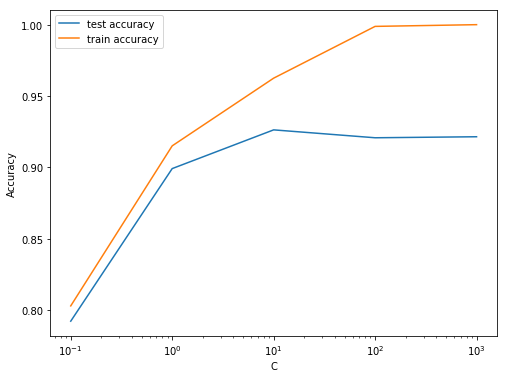

In [170]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results_Linear['param_C'], cv_results_Linear['mean_test_score'])
plt.plot(cv_results_Linear['param_C'], cv_results_Linear['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()

In [171]:
# Print the Highest Test Score and Best 'C' value
best_score_Linear = model_cv.best_score_
best_C_Linear = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score_Linear, best_C_Linear))

 The highest test accuracy is 0.92625 at C = 10


In [173]:
# model with the best value of C
model = SVC(C=best_C_Linear)

# fit
model.fit(X_train_Linear, y_train_Linear)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [174]:
# predict with the Current 30% of the Data with 800 entries

y_pred_linear = model.predict(X_test_Linear)

In [175]:
# metrics
# print other metrics

# accuracy
print("Accuracy : ", metrics.accuracy_score(y_test_Linear, y_pred_Linear))

Accuracy :  0.90875


#### We can see that the Test Accuracy is 90.87% using Linear Model

### Step 7 : Model Building - Non Linear Model (RBF)

In [83]:
help(SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly

In [176]:
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='rbf')
model.fit(X_train_Rbf, y_train_Rbf)
y_pred_Rbf = model.predict(X_test_Rbf)

In [177]:
# confusion matrix
confusion_matrix(y_true=y_test_Rbf, y_pred=y_pred_Rbf)

array([[241,   0,   0,   0,   0,   4,   3,   0,   2,   0],
       [  0, 237,   0,   2,   0,   0,   0,   0,   0,   0],
       [  2,   3, 203,   0,   5,   1,   5,   3,   6,   0],
       [  3,   3,   5, 193,   0,  18,   3,   0,   4,   1],
       [  1,   2,   1,   0, 230,   0,   1,   1,   0,  11],
       [  1,   3,   0,   5,   1, 214,   2,   1,   3,   1],
       [  3,   2,   4,   0,   3,   4, 245,   0,   1,   0],
       [  1,   2,   7,   0,   3,   0,   0, 193,   2,  12],
       [  1,   6,   3,   8,   1,  14,   2,   2, 206,   2],
       [  3,   0,   1,   3,   9,   2,   0,   6,   2, 222]], dtype=int64)

In [178]:
# accuracy
print("Accuracy : ", metrics.accuracy_score(y_test_Rbf, y_pred_Rbf))

Accuracy :  0.91


## Hyperparameter Tuning 

Now, we have multiple hyperparameters to optimise - 
- The choice of kernel (linear, rbf etc.)
- C
- gamma

We'll use the ```GridSearchCV()``` method to tune the hyperparameters. 

### 7a. Grid Search to Find Optimal Hyperparameters - RBF

Let's first use the RBF kernel to find the optimal C and gamma (we can consider the kernel as a hyperparameter as well, though training the model will take an exorbitant amount of time). 

In [179]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_Rbf, y_train_Rbf)                  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [181]:
# cv results
cv_results_Rbf = pd.DataFrame(model_cv.cv_results_)
cv_results_Rbf

mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0       13.646476         4.815017         0.943393          0.975536       1   
1       20.002614         4.902242         0.894821          0.906741       1   
2       48.227709         7.116416         0.757857          0.773527       1   
3       10.773000         3.242796         0.952143          0.999911      10   
4        9.158161         3.132131         0.921964          0.956161      10   
5       18.952868         5.104343         0.893929          0.905536      10   
6       10.626475         3.381198         0.951964          1.000000     100   
7        7.325294         2.674415         0.919643          0.996205     100   
8        8.787278         2.974512         0.916964          0.950804     100   
9       10.431053         3.228292         0.951964          1.000000    1000   
10       7.442099         2.708505         0.918571          1.000000    1000   
11       7.245980         2.450419         0.910179          0.990223    1000   

   param_gamma                        params  rank_test_score  \
0         0.01       {'C': 1, 'gamma': 0.01}                4   
1        0.001      {'C': 1, 'gamma': 0.001}               10   
2       0.0001     {'C': 1, 'gamma': 0.0001}               12   
3         0.01      {'C': 10, 'gamma': 0.01}                1   
4        0.001     {'C': 10, 'gamma': 0.001}                5   
5       0.0001    {'C': 10, 'gamma': 0.0001}               11   
6         0.01     {'C': 100, 'gamma': 0.01}                2   
7        0.001    {'C': 100, 'gamma': 0.001}                6   
8       0.0001   {'C': 100, 'gamma': 0.0001}                8   
9         0.01    {'C': 1000, 'gamma': 0.01}                2   
10       0.001   {'C': 1000, 'gamma': 0.001}                7   
11      0.0001  {'C': 1000, 'gamma': 0.0001}                9   

    split0_test_score  split0_train_score       ...         split2_test_score  \
0            0.939286            0.976562       ...                  0.945536   
1            0.883036            0.908259       ...                  0.900893   
2            0.742857            0.763170       ...                  0.719643   
3            0.954464            0.999777       ...                  0.956250   
4            0.914286            0.958705       ...                  0.923214   
5            0.882143            0.907589       ...                  0.898214   
6            0.954464            1.000000       ...                  0.956250   
7            0.908929            0.996429       ...                  0.918750   
8            0.906250            0.954018       ...                  0.919643   
9            0.954464            1.000000       ...                  0.956250   
10           0.907143            1.000000       ...                  0.917857   
11           0.902679            0.990625       ...                  0.905357   

    split2_train_score  split3_test_score  split3_train_score  \
0             0.975223           0.950893            0.975223   
1             0.906250           0.911607            0.902455   
2             0.751786           0.794643            0.782589   
3             1.000000           0.956250            1.000000   
4             0.954911           0.936607            0.952902   
5             0.904018           0.914286            0.901563   
6             1.000000           0.955357            1.000000   
7             0.995982           0.933036            0.996652   
8             0.950223           0.933929            0.946875   
9             1.000000           0.955357            1.000000   
10            1.000000           0.933036            1.000000   
11            0.990848           0.925000            0.989955   

    split4_test_score  split4_train_score  std_fit_time  std_score_time  \
0            0.947321            0.974777      0.822507        0.659116   
1            0.899107            0.906473      0.30102

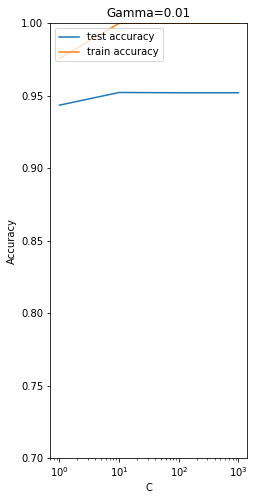

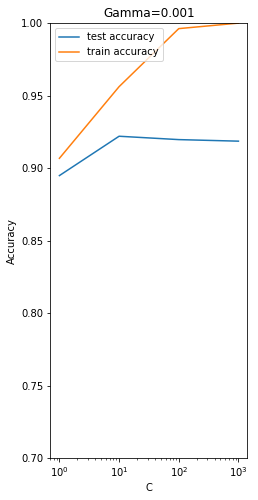

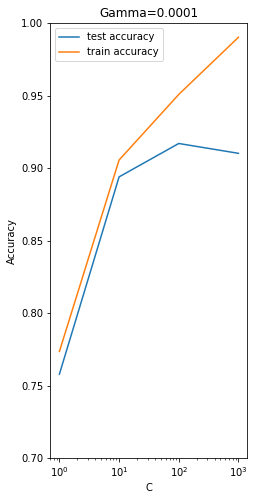

In [182]:
# converting C to numeric type for plotting on x-axis
cv_results_Rbf['param_C'] = cv_results_Rbf['param_C'].astype('int')

# # plotting
plt.figure(figsize=(12,8))

# subplot 1/3
plt.subplot(1,3,1)
gamma_01 = cv_results_Rbf[cv_results_Rbf['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.7, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()

# subplot 2/3
plt.figure(figsize=(12,8))
plt.subplot(132)
gamma_001 = cv_results_Rbf[cv_results_Rbf['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.7, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()

# subplot 3/3
plt.figure(figsize=(12,8))
plt.subplot(133)
gamma_0001 = cv_results_Rbf[cv_results_Rbf['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.7, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()

In [183]:
# printing the optimal accuracy score and hyperparameters
best_score_Rbf = model_cv.best_score_
best_hyperparams_Rbf = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score_Rbf, best_hyperparams_Rbf))

The best test score is 0.9521428571428572 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


In [184]:
# specify optimal hyperparameters
best_params_Rbf = {"C": 10, "gamma": 0.01, "kernel":"rbf"}

# model
model = SVC(C=10, gamma=0.01, kernel="rbf")

model.fit(X_train_Rbf, y_train_Rbf)
y_pred_Rbf = model.predict(X_test_Rbf)

# metrics
print(metrics.confusion_matrix(y_test_Rbf, y_pred_Rbf), "\n")
print("Accuracy : ", metrics.accuracy_score(y_test_Rbf, y_pred_Rbf))

[[247   0   1   0   0   0   1   0   1   0]
 [  0 236   1   1   1   0   0   0   0   0]
 [  2   0 218   1   1   1   0   2   3   0]
 [  1   1   4 213   0   7   1   0   3   0]
 [  0   2   1   0 240   0   0   0   0   4]
 [  1   0   0   3   0 224   0   0   2   1]
 [  1   0   1   0   2   3 255   0   0   0]
 [  0   1   4   0   2   0   0 210   1   2]
 [  0   0   1   4   0   4   3   1 231   1]
 [  2   0   1   2   3   0   0   2   3 235]] 

Accuracy :  0.962083333333


#### Thus using RBF Function, the Best Accuracy that we can obtain is 96.20%

### Step 8 : Model Building - Non Linear Model (Polynomial)

In [186]:
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='poly')
model.fit(X_train_Poly, y_train_Poly)
y_pred_Poly = model.predict(X_test_Poly)

In [189]:
# confusion matrix
confusion_matrix(y_true=y_test_Poly, y_pred=y_pred_Poly)

array([[ 25,   0,   2,   0,   0,   0,   0, 223,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 239,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 228,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0, 229,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 247,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 231,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0, 261,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 220,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0, 244,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 248,   0,   0]], dtype=int64)

In [190]:
# accuracy
print("Accuracy : ", metrics.accuracy_score(y_test_Poly, y_pred_Poly))

Accuracy :  0.102083333333


#### We get a Very low value of Accuracy using a Polynomial Fit = 10.20%

### 8a. Grid Search to Find Optimal Hyperparameters - Polynomial

Let's first use the RBF kernel to find the optimal C and gamma (we can consider the kernel as a hyperparameter as well, though training the model will take an exorbitant amount of time). 

In [191]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="poly")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_Poly, y_train_Poly)                  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 16.9min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [192]:
# cv results
cv_results_Poly = pd.DataFrame(model_cv.cv_results_)
cv_results_Poly

mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0       17.084695         3.489193         0.915000          0.959464       1   
1       58.756977         7.167098         0.088750          0.105625       1   
2       59.838046         7.413473         0.088750          0.105625       1   
3       11.158891         2.713920         0.940714          0.997679      10   
4       58.264486         6.997414         0.290179          0.310848      10   
5       58.350910         7.158747         0.088750          0.105625      10   
6       10.208759         2.551292         0.941250          1.000000     100   
7       33.893819         5.635153         0.791250          0.812723     100   
8       58.835382         7.300696         0.088750          0.105625     100   
9       10.254596         2.540259         0.941250          1.000000    1000   
10      16.876570         3.597422         0.915000          0.959464    1000   
11      58.641193         7.002386         0.088750          0.105625    1000   

   param_gamma                        params  rank_test_score  \
0         0.01       {'C': 1, 'gamma': 0.01}                4   
1        0.001      {'C': 1, 'gamma': 0.001}                8   
2       0.0001     {'C': 1, 'gamma': 0.0001}                8   
3         0.01      {'C': 10, 'gamma': 0.01}                3   
4        0.001     {'C': 10, 'gamma': 0.001}                7   
5       0.0001    {'C': 10, 'gamma': 0.0001}                8   
6         0.01     {'C': 100, 'gamma': 0.01}                1   
7        0.001    {'C': 100, 'gamma': 0.001}                6   
8       0.0001   {'C': 100, 'gamma': 0.0001}                8   
9         0.01    {'C': 1000, 'gamma': 0.01}                1   
10       0.001   {'C': 1000, 'gamma': 0.001}                4   
11      0.0001  {'C': 1000, 'gamma': 0.0001}                8   

    split0_test_score  split0_train_score       ...         split2_test_score  \
0            0.906250            0.957366       ...                  0.918750   
1            0.092857            0.106250       ...                  0.077679   
2            0.092857            0.106250       ...                  0.077679   
3            0.936607            0.997321       ...                  0.942857   
4            0.265179            0.288616       ...                  0.224107   
5            0.092857            0.106250       ...                  0.077679   
6            0.933036            1.000000       ...                  0.948214   
7            0.800000            0.810268       ...                  0.774107   
8            0.092857            0.106250       ...                  0.077679   
9            0.933929            1.000000       ...                  0.948214   
10           0.906250            0.957366       ...                  0.918750   
11           0.092857            0.106250       ...                  0.077679   

    split2_train_score  split3_test_score  split3_train_score  \
0             0.960045           0.929464            0.957143   
1             0.105804           0.083036            0.106473   
2             0.105804           0.083036            0.106473   
3             0.997991           0.952679            0.997545   
4             0.262723           0.295536            0.325000   
5             0.105804           0.083036            0.106473   
6             1.000000           0.950893            1.000000   
7             0.800893           0.798214            0.823214   
8             0.105804           0.083036            0.106473   
9             1.000000           0.950893            1.000000   
10            0.960045           0.929464            0.957143   
11            0.105804           0.083036            0.106473   

    split4_test_score  split4_train_score  std_fit_time  std_score_time  \
0            0.914286            0.960268      0.186840        0.103953   
1            0.099107            0.104688      0.64587

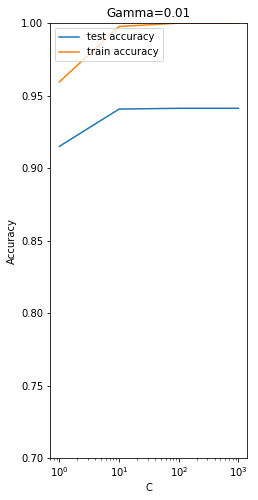

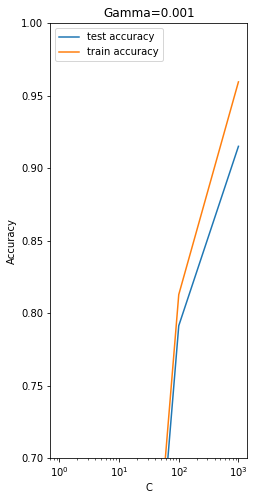

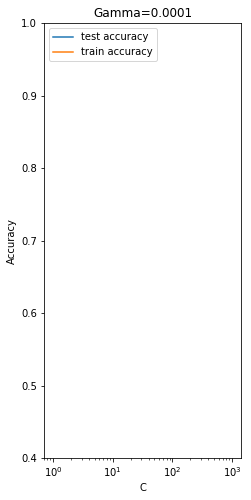

In [205]:
# converting C to numeric type for plotting on x-axis
cv_results_Poly['param_C'] = cv_results_Poly['param_C'].astype('int')

# # plotting
plt.figure(figsize=(12,8))

# subplot 1/3
plt.subplot(1,3,1)
gamma_01 = cv_results_Poly[cv_results_Poly['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.7, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()

# subplot 2/3
plt.figure(figsize=(12,8))
plt.subplot(1,3,2)
gamma_001 = cv_results_Poly[cv_results_Poly['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.7, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()

# subplot 3/3
plt.figure(figsize=(12,8))
plt.subplot(1,3,3)
gamma_0001 = cv_results_Poly[cv_results_Poly['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.4, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()

In [195]:
# printing the optimal accuracy score and hyperparameters
best_score_Poly = model_cv.best_score_
best_hyperparams_Poly = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score_Poly, best_hyperparams_Poly))

The best test score is 0.94125 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


In [206]:
# specify optimal hyperparameters
best_params = {"C": 100, "gamma": 0.01, "kernel":"poly"}

# model
model = SVC(C=100, gamma=0.01, kernel="poly")

model.fit(X_train_Poly, y_train_Poly)
y_pred_Poly = model.predict(X_test_Poly)

# metrics
print(metrics.confusion_matrix(y_test_Poly, y_pred_Poly), "\n")
print("Accuracy : ", metrics.accuracy_score(y_test_Poly, y_pred_Poly))

[[242   0   1   0   0   3   3   0   1   0]
 [  0 236   0   2   1   0   0   0   0   0]
 [  2   0 213   3   2   1   0   3   4   0]
 [  1   2   4 208   0   6   2   0   7   0]
 [  0   2   1   0 240   0   0   0   0   4]
 [  3   2   0   1   0 220   1   0   3   1]
 [  1   4   2   0   4   2 249   0   0   0]
 [  1   1   4   1   1   0   0 209   1   2]
 [  1   2   1   4   1   4   2   1 229   0]
 [  1   0   1   3   5   0   0   3   5 230]] 

Accuracy :  0.948333333333


#### The Final Accuracy using Polynomial Kernel is 94.83%

### Step 9 : Model Building - Non Linear Model (Sigmoid)

In [197]:
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='sigmoid')
model.fit(X_train_Sigmoid, y_train_Sigmoid)
y_pred_Sigmoid = model.predict(X_test_Sigmoid)

In [198]:
# confusion matrix
confusion_matrix(y_true=y_test_Sigmoid, y_pred=y_pred_Sigmoid)

array([[236,   0,   0,   0,   0,   8,   3,   0,   3,   0],
       [  0, 237,   0,   2,   0,   0,   0,   0,   0,   0],
       [  2,   4, 197,   1,   5,   1,   7,   3,   8,   0],
       [  3,   4,   4, 188,   0,  23,   2,   0,   5,   1],
       [  1,   4,   1,   0, 222,   0,   1,   1,   0,  17],
       [  1,   3,   0,   6,   1, 213,   2,   1,   3,   1],
       [  3,   4,   4,   0,   3,   3, 244,   0,   1,   0],
       [  1,   4,   7,   0,   3,   0,   0, 190,   2,  13],
       [  1,   6,   3,  12,   1,  14,   3,   2, 197,   6],
       [  4,   1,   1,   4,  10,   3,   0,   7,   0, 218]], dtype=int64)

In [199]:
# accuracy
print("Accuracy : ", metrics.accuracy_score(y_test_Sigmoid, y_pred_Sigmoid))

Accuracy :  0.8925


#### Therefore using Sigmoid Curve Kernel we get an accuracy of 89.25%. Let's choose other values of C and alpha and check

### 9a. Grid Search to Find Optimal Hyperparameters - Sigmoid

Let's first use the RBF kernel to find the optimal C and gamma (we can consider the kernel as a hyperparameter as well, though training the model will take an exorbitant amount of time). 

In [200]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="sigmoid")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_Sigmoid, y_train_Sigmoid)                  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [201]:
# cv results
cv_results_Sigmoid = pd.DataFrame(model_cv.cv_results_)
cv_results_Sigmoid

mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0       12.185596         3.793390         0.884464          0.896027       1   
1       26.232984         5.891472         0.878571          0.887143       1   
2       59.607071         7.699686         0.528036          0.541652       1   
3        7.337422         2.610046         0.817500          0.859598      10   
4       10.849167         3.498004         0.910536          0.938170      10   
5       25.279658         5.808351         0.878750          0.887411      10   
6        5.472897         1.948845         0.802857          0.858437     100   
7        7.412651         2.707073         0.911964          0.975625     100   
8       10.532225         3.410576         0.911071          0.938616     100   
9        5.360258         1.921010         0.795893          0.861161    1000   
10       7.024185         2.632802         0.900000          0.999464    1000   
11       7.523013         2.722343         0.912321          0.976250    1000   

   param_gamma                        params  rank_test_score  \
0         0.01       {'C': 1, 'gamma': 0.01}                6   
1        0.001      {'C': 1, 'gamma': 0.001}                8   
2       0.0001     {'C': 1, 'gamma': 0.0001}               12   
3         0.01      {'C': 10, 'gamma': 0.01}                9   
4        0.001     {'C': 10, 'gamma': 0.001}                4   
5       0.0001    {'C': 10, 'gamma': 0.0001}                7   
6         0.01     {'C': 100, 'gamma': 0.01}               10   
7        0.001    {'C': 100, 'gamma': 0.001}                2   
8       0.0001   {'C': 100, 'gamma': 0.0001}                3   
9         0.01    {'C': 1000, 'gamma': 0.01}               11   
10       0.001   {'C': 1000, 'gamma': 0.001}                5   
11      0.0001  {'C': 1000, 'gamma': 0.0001}                1   

    split0_test_score  split0_train_score       ...         split2_test_score  \
0            0.877679            0.900446       ...                  0.883929   
1            0.870536            0.890402       ...                  0.878571   
2            0.492857            0.519866       ...                  0.472321   
3            0.820536            0.867634       ...                  0.823214   
4            0.902679            0.940402       ...                  0.910714   
5            0.870536            0.890848       ...                  0.878571   
6            0.805357            0.863170       ...                  0.797321   
7            0.904464            0.975893       ...                  0.909821   
8            0.903571            0.941071       ...                  0.910714   
9            0.792857            0.863170       ...                  0.784821   
10           0.893750            1.000000       ...                  0.897321   
11           0.904464            0.977009       ...                  0.911607   

    split2_train_score  split3_test_score  split3_train_score  \
0             0.895759           0.899107            0.890179   
1             0.882589           0.894643            0.884821   
2             0.482812           0.548214            0.557143   
3             0.853571           0.833929            0.852232   
4             0.938170           0.927679            0.935045   
5             0.883036           0.895536            0.885045   
6             0.860491           0.811607            0.845536   
7             0.975670           0.925000            0.974107   
8             0.938170           0.927679            0.935045   
9             0.861830           0.804464            0.851562   
10            0.999554           0.915179            0.999330   
11            0.976116           0.924107            0.974330   

    split4_test_score  split4_train_score  std_fit_time  std_score_time  \
0            0.896429            0.892634      0.518703        0.118518   
1            0.882143            0.885714      0.51459

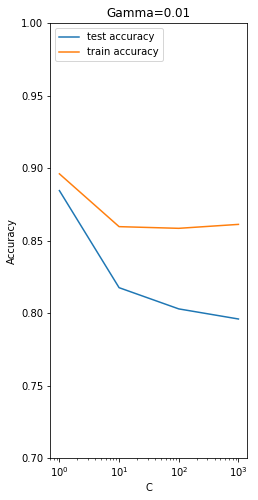

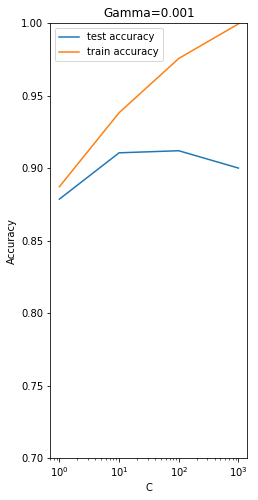

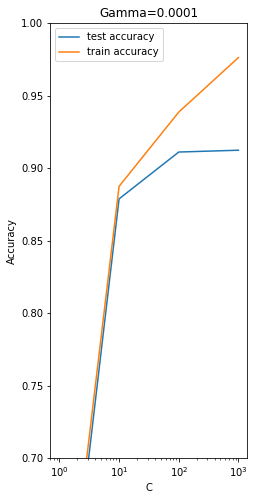

In [202]:
# converting C to numeric type for plotting on x-axis
#cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(12,8))

# subplot 1/3
plt.subplot(1,3,1)
gamma_01 = cv_results_Sigmoid[cv_results_Sigmoid['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.7, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()

# subplot 2/3
plt.figure(figsize=(12,8))
plt.subplot(1,3,2)
gamma_001 = cv_results_Sigmoid[cv_results_Sigmoid['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.7, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()

# subplot 3/3
plt.figure(figsize=(12,8))
plt.subplot(1,3,3)
gamma_0001 = cv_results_Sigmoid[cv_results_Sigmoid['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.7, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()

In [203]:
# printing the optimal accuracy score and hyperparameters
best_score_Sigmoid = model_cv.best_score_
best_hyperparams_Sigmoid = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score_Sigmoid, best_hyperparams_Sigmoid))

The best test score is 0.9123214285714286 corresponding to hyperparameters {'C': 1000, 'gamma': 0.0001}


In [204]:
# specify optimal hyperparameters
best_params = {"C": 1000, "gamma": 0.0001, "kernel":"sigmoid"}

# model
model = SVC(C=1000, gamma=0.0001, kernel="sigmoid")

model.fit(X_train_Sigmoid, y_train_Sigmoid)
y_pred_Sigmoid = model.predict(X_test_Sigmoid)

# metrics
print(metrics.confusion_matrix(y_test_Sigmoid, y_pred_Sigmoid), "\n")
print("Accuracy : ", metrics.accuracy_score(y_test_Sigmoid, y_pred_Sigmoid))

[[244   0   1   0   0   2   3   0   0   0]
 [  0 236   1   1   0   0   0   0   0   1]
 [  3   0 209   0   3   4   3   3   3   0]
 [  3   2   4 200   0  15   4   0   1   1]
 [  0   1   4   0 236   1   1   0   0   4]
 [  4   0   0   6   0 214   1   0   4   2]
 [  3   1   3   0   2   5 247   0   1   0]
 [  2   0   3   0   3   0   0 205   2   5]
 [  2   6   7   8   0   8   3   2 208   1]
 [  3   0   1   4   5   1   0   3   2 229]] 

Accuracy :  0.928333333333


#### The Final Accuracy using the Sigmoid Kernel is 92.83% 

### Therefore let's compare the Accuracies and find out the best

In [214]:
#Linear Model 
print("Accuracy of Linear Model : ", metrics.accuracy_score(y_test_Linear, y_pred_Linear)*100)

#RBF Model
print("Accuracy of the RBF Model : ", metrics.accuracy_score(y_test_Rbf, y_pred_Rbf)*100)

#Polynomial Model 
print("Accuracy of the Polynomial Model : ", metrics.accuracy_score(y_test_Poly, y_pred_Poly)*100)

#Sigmoid Model 
print("Accuracy of the Sigmoid Model : ", metrics.accuracy_score(y_test_Sigmoid, y_pred_Sigmoid)*100)

Accuracy of Linear Model :  90.875
Accuracy of the RBF Model :  96.2083333333
Accuracy of the Polynomial Model :  94.8333333333
Accuracy of the Sigmoid Model :  92.8333333333


## Clearly RBF Model does a fantastic job in Predicting 96.20% of the Digits correctly 